In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import sklearn.feature_extraction.text as pre
from sklearn import preprocessing
import pickle as pk

In [3]:
data=pd.read_csv("spamPretraité.csv")
Y = data["label"].to_numpy() 
Y[Y == "ham"]=0
Y[Y == "spam"]=1
Y = Y.astype('int')

In [4]:
X=pd.read_csv("countMatrix")
X= X.to_numpy()

In [5]:
 

 
X_train = X[0:3300]
X_test = X[3300:4197]
Y_train = Y[0:3300]
Y_test = Y[3300:4197]


from sklearn.preprocessing import MinMaxScaler
# Normalize data

X_train = np.asarray(X_train).astype('float32')
 

In [7]:

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(data.email,data.Spam,test_size=0.2 ,random_state=42)

**Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian)
Here I use Multinominal Bayes Because here data in a discrete form 
discrete data(e.g movie ratings ranging  1 to 5 as each rating will have certain frequency to represent)**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier


In [10]:
from sklearn.pipeline import Pipeline
model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)


In [12]:
model.fit(X_train ,Y_train)


GradientBoostingClassifier()

In [23]:
# train the model multiple times
num_iterations = 5
for i in range(num_iterations):
    # fit the model on a random subset of the training data
    model.fit(X_train ,Y_train)
    # evaluate the model on the testing data
    accuracy = model.score(X_test, Y_test)
    print(f'Iteration {i+1}: accuracy = {accuracy:.3f}')

Iteration 1: accuracy = 0.970
Iteration 2: accuracy = 0.972
Iteration 3: accuracy = 0.972


In [13]:
model.score(X_test ,Y_test)


0.9721293199554069

In [14]:
y_pred=model.predict(X_test)

Confusion Matrix :

In [15]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and predicted with your model
cm = confusion_matrix(Y_test, y_pred)
print(cm)


[[593   7]
 [ 18 279]]


ROC Curve

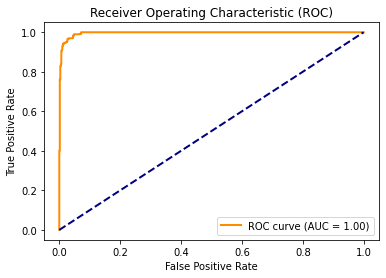

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained and predicted with your model
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve :


In [21]:
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"thresholds : {thresholds}")



precision : [0.33110368 0.33147321 0.33184358 0.33221477 0.33258679 0.33295964
 0.33333333 0.33370787 0.33408324 0.33445946 0.33483653 0.33521445
 0.33559322 0.33597285 0.33635334 0.33673469 0.33711691 0.33788396
 0.33826879 0.3386545  0.3390411  0.33942857 0.33981693 0.34020619
 0.34059633 0.34098737 0.34137931 0.34177215 0.3421659  0.34256055
 0.34295612 0.3433526  0.34375    0.34454756 0.34494774 0.34534884
 0.34575087 0.34615385 0.34655776 0.34696262 0.34736842 0.34777518
 0.34818288 0.34859155 0.34900118 0.34941176 0.34982332 0.35023585
 0.35064935 0.35106383 0.35147929 0.35189573 0.35273159 0.35315101
 0.35357143 0.35441527 0.35483871 0.35526316 0.35568862 0.35611511
 0.35654262 0.35697115 0.35740072 0.35783133 0.35826297 0.35869565
 0.35912938 0.35956416 0.36       0.36043689 0.36087485 0.36131387
 0.36175396 0.36219512 0.36263736 0.36308068 0.36352509 0.36397059
 0.36441718 0.36486486 0.36531365 0.36576355 0.36621455 0.36666667
 0.3671199  0.36757426 0.36802974 0.36848635 0.368

precision_recall_curve : 

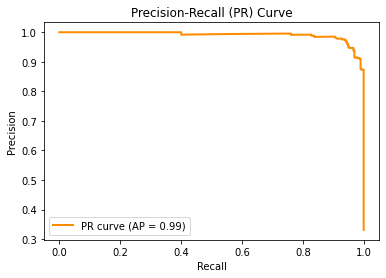

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have already trained and predicted with your model
y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
avg_precision = average_precision_score(Y_test, y_pred_prob)

# Plot PR curve
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.show()


Word Cloud: You can create a word cloud to visualize the most common words in your spam and non-spam emails. This can help you understand the characteristics of spam emails and non-spam emails and potentially help you improve your feature engineering

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read in the CSV files
easy_ham = pd.read_csv('../Datasets/email_data_easy_ham.csv' , encoding='ISO-8859-1')
hard_spam = pd.read_csv('../Datasets/email_data_hard_ham.csv', encoding='ISO-8859-1')
spam = pd.read_csv('../Datasets/email_data_spam.csv', encoding='ISO-8859-1')

# Combine the data frames
data = pd.concat([easy_ham, hard_spam, spam])
data = data.drop(columns=data.columns[data.columns.str.contains('Unnamed')])
data['Spam']=data['label'].apply(lambda x:1 if x=='spam' else 0)
data = data.drop(columns=data.columns[data.columns.str.contains('label')])
# data= data.rename(columns={'email' : 'email2'})
# drop the "emails" column

# rename preprocessed_email to email 
data= data.rename(columns={'preprocessed_email' : 'email'})
# Replace NaN values in 'email' column with values from 'email2' column
# data['email'] = np.where(pd.isnull(data['email']), data['email2'], data['email'])
# data = data.drop("email2", axis=1)

# data =data.fillna("")
# replace any NaN values in the 'email' column with an empty string
data['email'] = data['email'].fillna('')


# use the str.contains() method to find emails that contain 'Nan'
mask = data['email'].str.contains('Nan')

# filter out the emails that contain 'Nan'
data = data[~mask]
data


,email,Spam
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,Man Threatens Explosion In Moscow \n\nThursday...,0
3,Klez: The Virus That Won't Die\n \nAlready the...,0
4,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",0
...,...,...
1391,"<html>\n<head>\n<meta http-equiv=""content-type...",1
1392,\t Preferred Non-Smoker\n \t\n Just what the ...,1
1393,"Dear Subscriber,\n\nIf I could show you a way ...",1
1394,****Mid-Summer Customer Appreciation SALE!****...,1


WordCloud : 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and the 'Spam' column contains the label (0 for ham, 1 for spam) and 'email' column contains the email text data

# Separate ham and spam emails
ham_emails = data[data['Spam'] == 0] 
spam_emails = data[data['Spam'] == 1] 
# # Create a WordCloud object for ham emails
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(ham_emails['email']))

# # Create a WordCloud object for spam emails
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(spam_emails['email']))




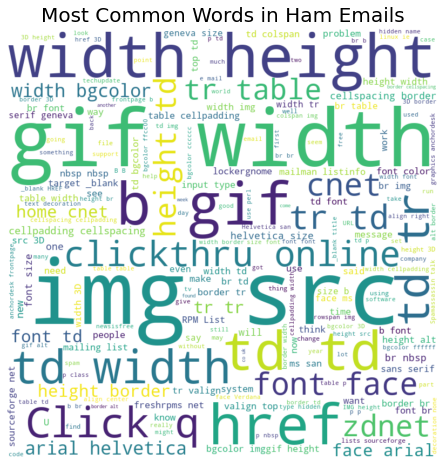

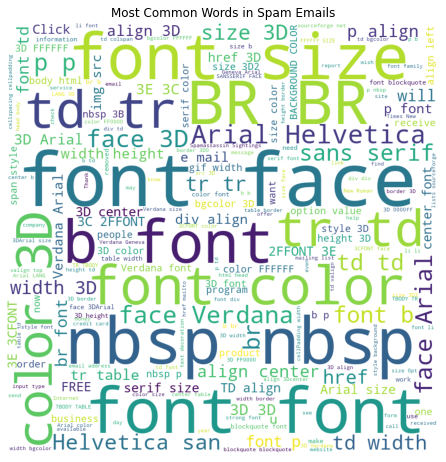

In [ ]:
# Display the ham word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Ham Emails', fontsize=20)
plt.show()

# # Display the spam word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Spam Emails')
plt.show()